In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uspollution/pollution_us_2000_2016.csv


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Air pollution analysis</strong></h1>
</div>

<img src="https://airqoon.com/wp-content/uploads/2022/11/1-X36FiP4n5kVgxJmwIS4idg-1024x685.webp" width=1200>

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Exploratory Data Analysis</strong></h1>
</div>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv(r'/kaggle/input/uspollution/pollution_us_2000_2016.csv')

In [25]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [26]:
df.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [27]:
df.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Change Datatype</strong></h1>
</div>

In [28]:
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')

In [29]:
df.dtypes

Unnamed: 0                    int64
State Code                    int64
County Code                   int64
Site Num                      int64
Address                      object
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Units                    object
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Units                     object
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Units                    object
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Units                     object
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour             

In [30]:
# Fill missing CO AQI with the mean of CO AQI
co_aqi_mean = df['CO AQI'].mean()
df['CO AQI'] = df['CO AQI'].fillna(co_aqi_mean)

# Fill missing SO2 AQI with the mean of SO2 AQI
so2_aqi_mean = df['SO2 AQI'].mean()
df['SO2 AQI'] = df['SO2 AQI'].fillna(so2_aqi_mean)

In [31]:
# Convert NO2 and SO2 columns from ppb to ppm
df['NO2 Mean'] = df['NO2 Mean'] / 1000
df['SO2 Mean'] = df['SO2 Mean'] / 1000
df['NO2 1st Max Value'] = df['NO2 1st Max Value'] / 1000
df['SO2 1st Max Value'] = df['SO2 1st Max Value'] / 1000

In [32]:
# Drop unnecessary columns (Units, AQI, etc.), excluding SO2 and CO AQI
columns_to_drop = ['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
                   'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units']
df = df.drop(columns=columns_to_drop)

In [33]:
# Check for missing values after cleaning
missing_values_after = df.isnull().sum()
print("Missing Values After Cleaning:")
print(missing_values_after)

Missing Values After Cleaning:
State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64


In [34]:
# Check data types after conversion
dtypes_after = df.dtypes
print("\nData Types After Cleaning:")
print(dtypes_after)


Data Types After Cleaning:
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
dtype: object


In [35]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.003000,0.0090,21,13.000000,1.145833,4.2,21,5.996595
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.003000,0.0090,21,13.000000,0.878947,2.2,23,25.000000
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.002975,0.0066,23,7.115945,1.145833,4.2,21,5.996595
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.002975,0.0066,23,7.115945,0.878947,2.2,23,25.000000
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,10,27,0.001958,0.0030,22,4.000000,0.850000,1.6,23,5.996595


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Date-Based Feature Extraction</strong></h1>
</div>

In [36]:
# Extract year, quarter, month name, day name
df['Year'] = df['Date Local'].dt.year
df['Qtr'] = df['Date Local'].dt.quarter
df['Qtr'] = [f'Qtr {i}' for i in df['Qtr']]
df['Month'] = df['Date Local'].dt.month_name()
df['Day'] = df['Date Local'].dt.day_name()

# Weekend flag
df['IsWeekend'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# USA season classification
df['Seasons'] = np.where(df['Month'].isin(['December', 'January', 'February']), 'Winter',
                 np.where(df['Month'].isin(['March', 'April', 'May']), 'Spring',
                 np.where(df['Month'].isin(['June', 'July', 'August']), 'Summer', 'Fall')))


In [37]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year,Qtr,Month,Day,IsWeekend,Seasons
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,1.145833,4.2,21,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,0.878947,2.2,23,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,1.145833,4.2,21,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,0.878947,2.2,23,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,0.850000,1.6,23,5.996595,2000,Qtr 1,January,Sunday,Weekend,Winter


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Region Assignment Based on State
</strong></h1>
</div>

In [38]:
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 
             'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']

south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
         'Virginia', 'District Of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 
         'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']

west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
        'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

# Assign region
df['region'] = np.where(df['State'].isin(northeast), 'Northeast',
                np.where(df['State'].isin(midwest), 'Midwest',
                np.where(df['State'].isin(south), 'South',
                np.where(df['State'].isin(west), 'West', 'Other'))))


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Inland or Costal based on State</strong></h1>
</div>

In [39]:
coastal_states = [
    'Alabama', 'Alaska', 'California', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
    'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina',
    'Oregon', 'Rhode Island', 'South Carolina', 'Texas', 'Virginia', 'Washington'
]
df['area_type'] = df['State'].apply(lambda x: 'Coastal' if x in coastal_states else 'Inland')


In [40]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,Year,Qtr,Month,Day,IsWeekend,Seasons,region,area_type
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,21,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,23,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,21,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,23,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,23,5.996595,2000,Qtr 1,January,Sunday,Weekend,Winter,West,Inland


In [41]:
print(df['area_type'].value_counts())


area_type
Coastal    1090213
Inland      656448
Name: count, dtype: int64


In [42]:
# Create unified Max AQI column
df['Max AQI'] = df[['NO2 AQI', 'O3 AQI', 'CO AQI']].max(axis=1)

In [43]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,CO AQI,Year,Qtr,Month,Day,IsWeekend,Seasons,region,area_type,Max AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland,46.0
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland,46.0
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,5.996595,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland,46.0
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,25.000000,2000,Qtr 1,January,Saturday,Weekend,Winter,West,Inland,46.0
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,5.996595,2000,Qtr 1,January,Sunday,Weekend,Winter,West,Inland,34.0


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Max AQI Over the Years</strong></h1>
</div>

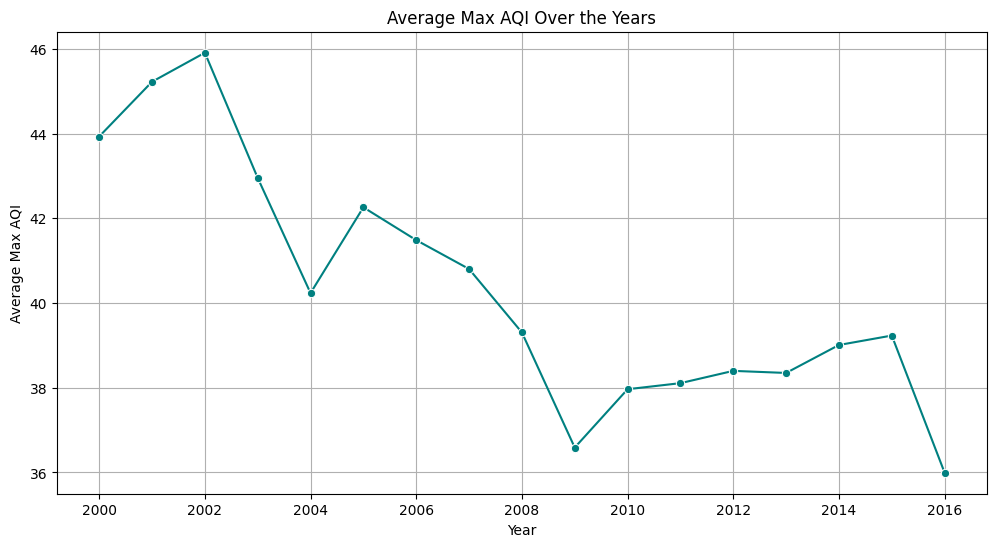

In [44]:
df_year = df.groupby('Year')['Max AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sb.lineplot(data=df_year, x='Year', y='Max AQI', marker='o', color='teal')
plt.title('Average Max AQI Over the Years')
plt.ylabel('Average Max AQI')
plt.grid(True)
plt.show()

#### Insight:  
#### Pollution levels were higher in the early 2000s but started to drop gradually year by year.This indicates an overall improvement in air quality across the United States during this period.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Top 10 Most Polluted Cities</strong></h1>
</div>

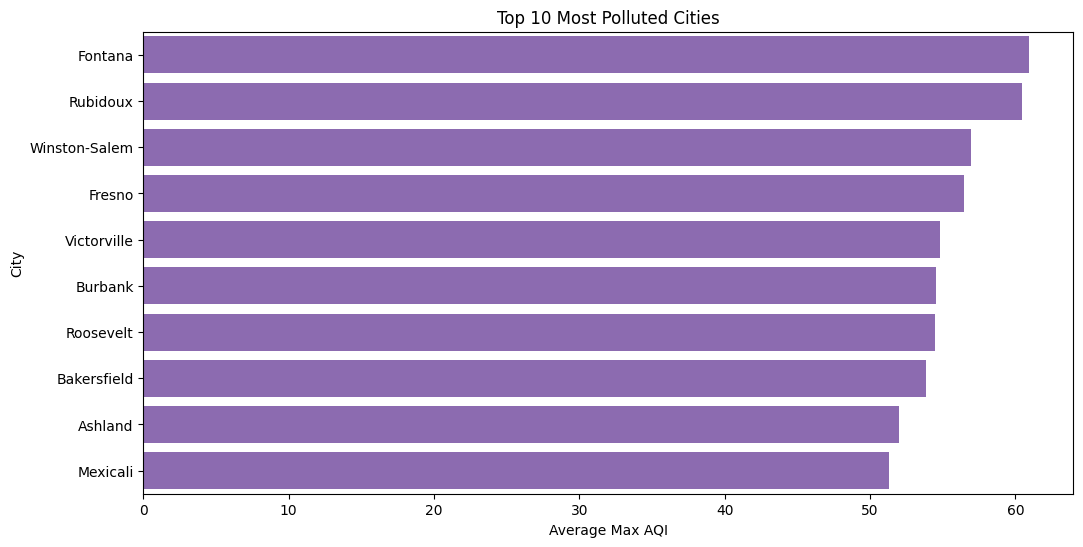

In [45]:
top_cities = df.groupby('City')['Max AQI'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sb.barplot(data=top_cities, x='Max AQI', y='City', color='#8B5FBC')
plt.title('Top 10 Most Polluted Cities')
plt.xlabel('Average Max AQI')
plt.show()

#### Insight:  
#### Fontana and Rubidoux rank as the most polluted cities based on average Max AQI values. Cities like Winston-Salem, Fresno, and Victorville also show consistently high pollution levels.These areas likely suffer from a mix of traffic congestion, industrial emissions, and weather patterns that trap pollutants near the ground.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Year-wise NO2 AQI Trend</strong></h1>
</div>

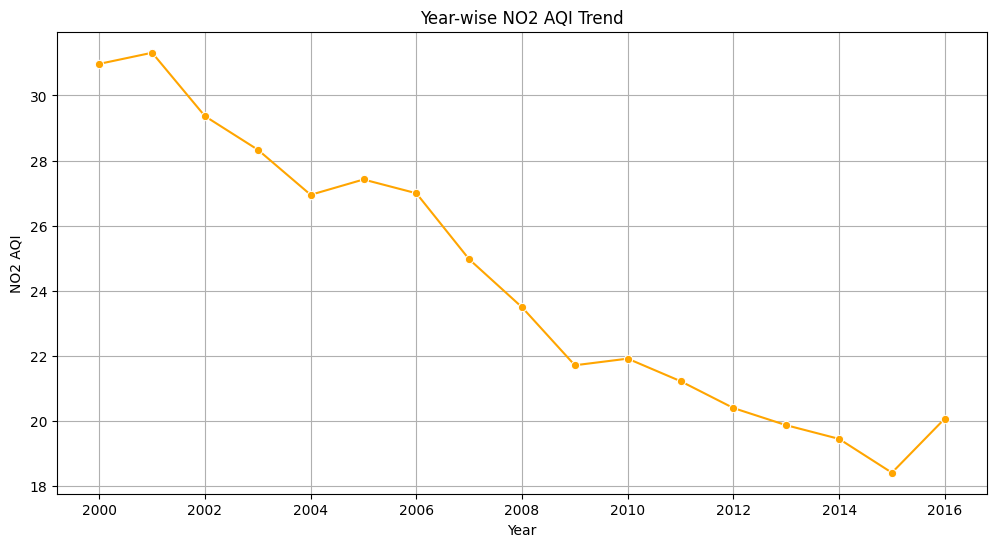

In [46]:
df_no2 = df.groupby('Year')['NO2 AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sb.lineplot(data=df_no2, x='Year', y='NO2 AQI', marker='o', color='orange')
plt.title('Year-wise NO2 AQI Trend')
plt.grid(True)
plt.show()


 #### Insight: 

#### The NO2 AQI (Nitrogen Dioxide Air Quality Index) has gone down steadily from 2000 to 2016.This means the air quality related to NO2 got better, possibly because of cleaner fuel, better vehicles, and strict pollution rules.  


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Ozone AQI by Region</strong></h1>
</div>

In [47]:
print(df.groupby('region')['Max AQI'].describe())

              count       mean        std   min   25%   50%   75%    max
region                                                                  
Midwest    196674.0  37.841047  16.684903   5.0  28.0  35.0  43.0  201.0
Northeast  376857.0  40.252523  19.641823   6.0  29.0  36.0  44.0  207.0
Other        9506.0  44.598359  20.326873  11.0  31.0  39.0  51.0  211.0
South      407076.0  39.850922  18.609694   2.0  29.0  36.0  45.0  206.0
West       756548.0  41.040192  18.842660   3.0  31.0  37.0  45.0  218.0


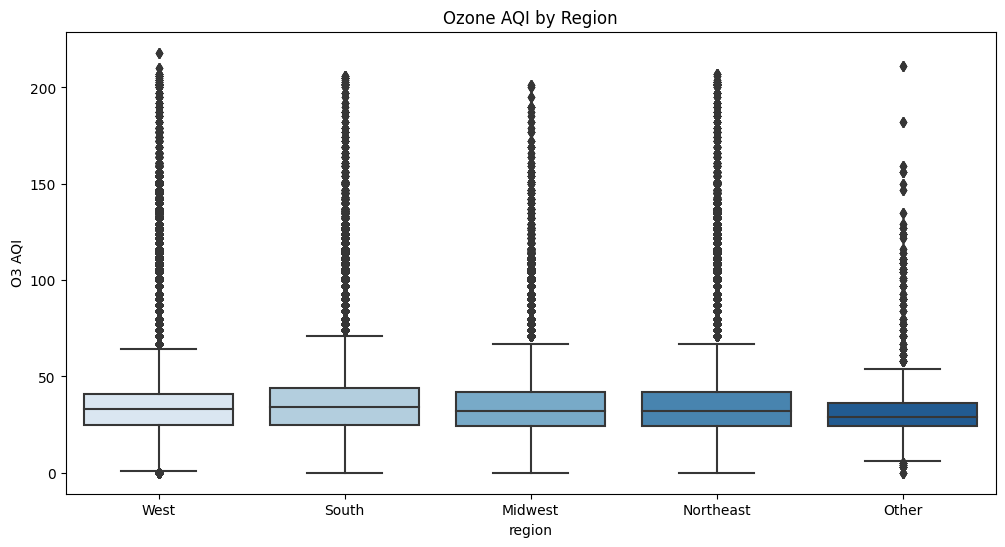

In [48]:
plt.figure(figsize=(12,6))
sb.boxplot(data=df, x='region', y='O3 AQI', palette='Blues')
plt.title('Ozone AQI by Region')
plt.show()


#### Insight:

#### All regions show similar ozone AQI levels, but the South and Midwest have slightly higher medians.Frequent outliers across regions indicate occasional high ozone pollution events.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Top 10 States with Highest CO AQI</strong></h1>
</div>

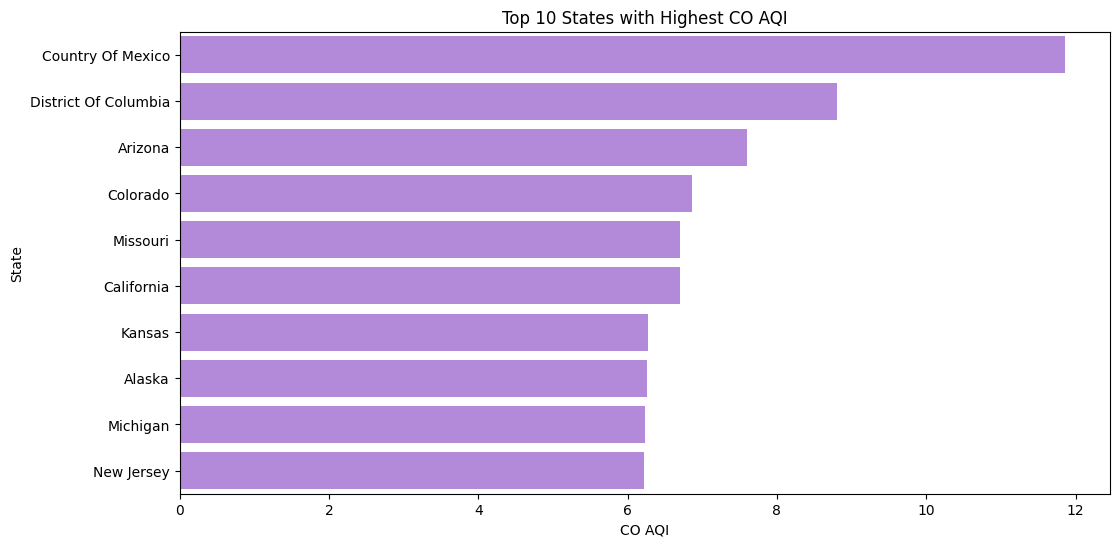

In [49]:
state_co = df.groupby('State')['CO AQI'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sb.barplot(data=state_co, x='CO AQI', y='State', color='#B47DE6')
plt.title('Top 10 States with Highest CO AQI')
plt.show()


#### Insight:

#### The highest CO AQI levels are observed in the Country of Mexico and District of Columbia, followed by several western and midwestern states.  This indicates higher carbon monoxide pollution likely due to traffic and industrial emissions.



<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Seasonal Variation of Max AQI</strong></h1>
</div>

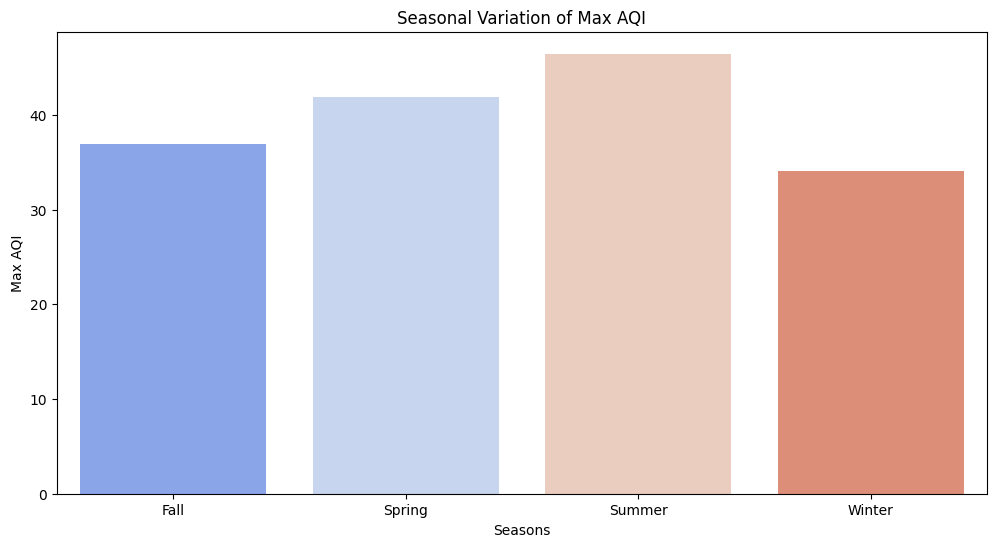

In [50]:
seasonal = df.groupby('Seasons')['Max AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sb.barplot(data=seasonal, x='Seasons', y='Max AQI', palette='coolwarm')
plt.title('Seasonal Variation of Max AQI')
plt.show()


#### Insight:

#### Summer shows the highest maximum AQI, indicating poorer air quality during this season.Winter records the lowest max AQI, suggesting comparatively cleaner air.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Weekend vs Weekday AQI</strong></h1>
</div>

In [51]:
print(df.groupby('IsWeekend')['Max AQI'].describe())

               count       mean        std  min   25%   50%   75%    max
IsWeekend                                                               
Weekday    1251223.0  40.316700  18.733216  5.0  30.0  37.0  45.0  211.0
Weekend     495438.0  40.089361  18.869349  2.0  30.0  36.0  44.0  218.0


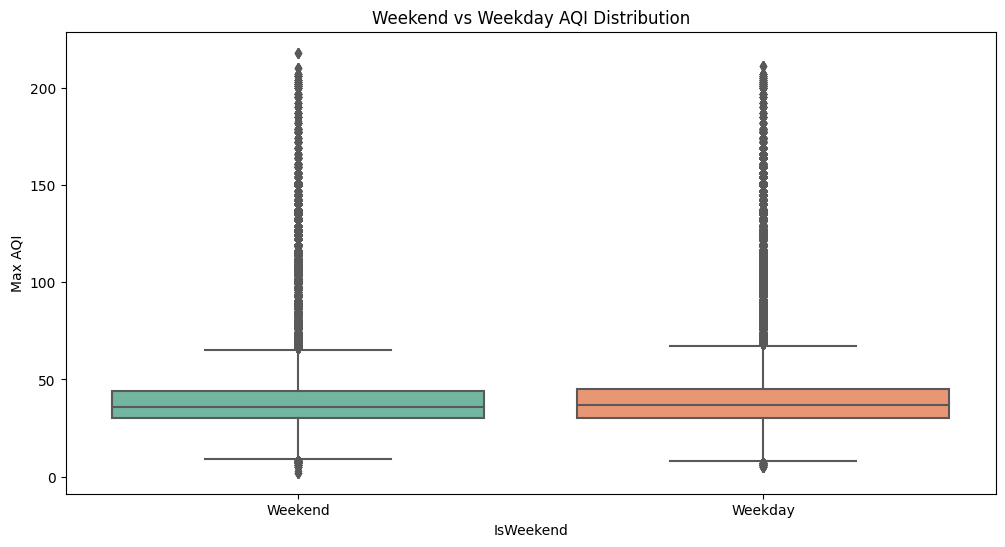

In [52]:
plt.figure(figsize=(12,6))
sb.boxplot(data=df, x='IsWeekend', y='Max AQI', palette='Set2')
plt.title('Weekend vs Weekday AQI Distribution')
plt.show()


#### Insight:

#### AQI levels are slightly higher on weekdays compared to weekends,possibly due to increased traffic and industrial activity.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Monthly Average Max AQI</strong></h1>
</div>

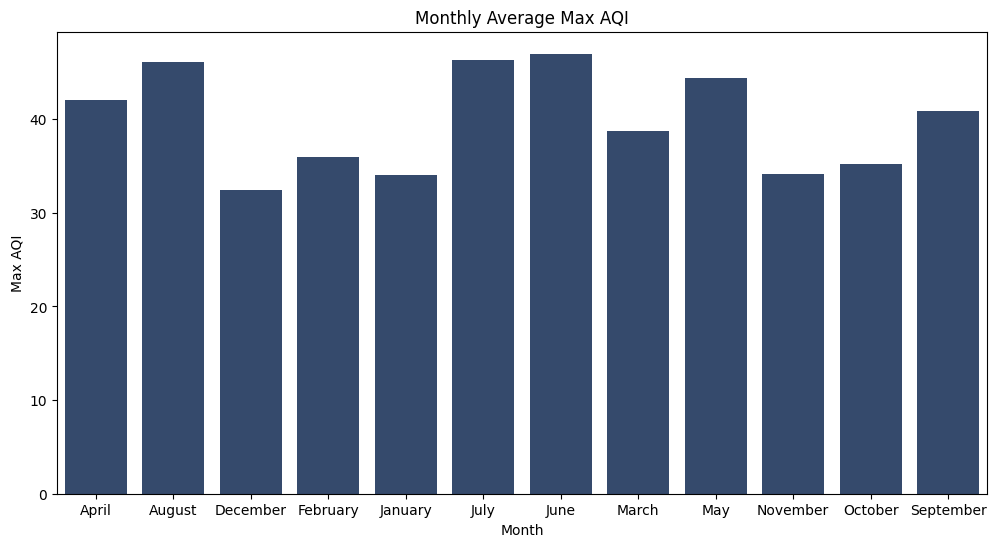

In [53]:
month_avg = df.groupby('Month')['Max AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sb.barplot(data=month_avg, x='Month', y='Max AQI',color='#2C4875')
plt.title('Monthly Average Max AQI')
plt.show()


#### Insight:

#### June and July show the highest average AQI, indicating poorer air quality during peak summer months.


<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>AQI by Area Type</strong></h1>
</div>

In [54]:
print(df.groupby('area_type')['Max AQI'].describe())

               count       mean        std  min   25%   50%   75%    max
area_type                                                               
Coastal    1090213.0  39.580317  19.024625  3.0  29.0  36.0  44.0  218.0
Inland      656448.0  41.368090  18.290882  2.0  31.0  38.0  47.0  211.0


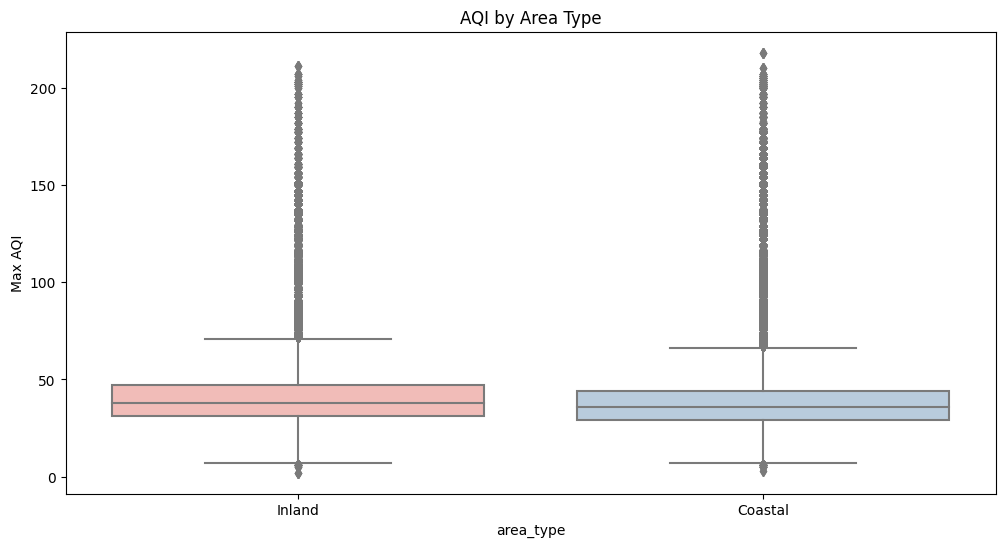

In [55]:
plt.figure(figsize=(12,6))
sb.boxplot(data=df, x='area_type', y='Max AQI', palette='Pastel1')
plt.title('AQI by Area Type')
plt.show()

#### Insight:

#### Inland areas have higher maximum AQI values compared to coastal areas.This suggests poorer air quality inland, likely due to less natural air circulation and potentially more industrial activity.

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Average AQI by Month and Pollutant</strong></h1>
</div>

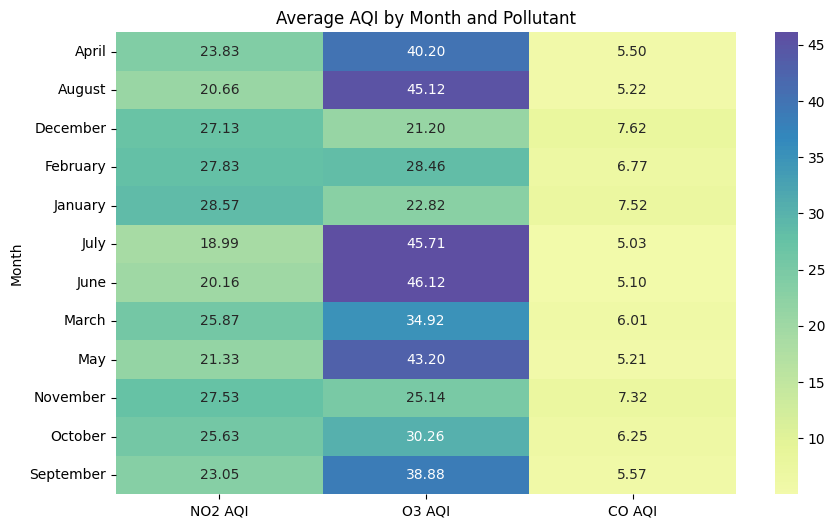

In [56]:
pollutant_month = df.groupby('Month')[['NO2 AQI', 'O3 AQI', 'CO AQI']].mean()
plt.figure(figsize=(10,6))
#sb.heatmap(pollutant_month, annot=True, cmap='coolwarm')  
sb.heatmap(pollutant_month, annot=True, cmap="Spectral", center=0, fmt=".2f")
plt.title('Average AQI by Month and Pollutant')
plt.show()


#### Insight:

#### July to September see the highest average AQI levels.Pollutants such as NO₂, O₃ (ozone), and CO contribute significantly, especially in warmer months.Seasonal patterns show increased pollution in summer, likely due to heat-induced chemical reactions and increased energy use.

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>10 Most Polluted Counties</strong></h1>
</div>

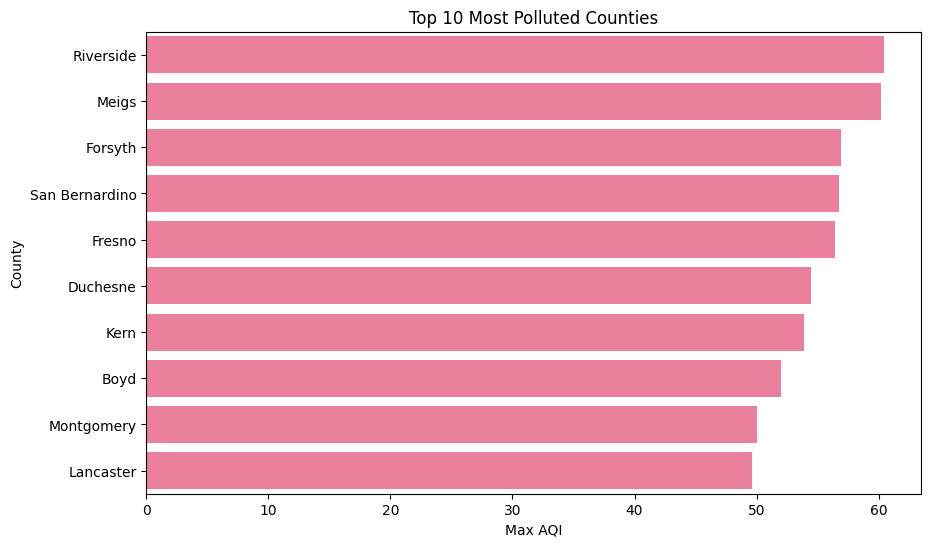

In [57]:
top_counties = df.groupby('County')['Max AQI'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sb.barplot(data=top_counties, x='Max AQI', y='County', color='#FB6F92')
plt.title('Top 10 Most Polluted Counties')
plt.show()


#### Insight:

#### Riverside, Meigs, and Forsyth have the highest max AQI, indicating the worst air quality.These counties face elevated pollution due to urban emissions, industrial activities, and poor dispersion conditions.Most listed counties exceed a Max AQI of 50, suggesting moderate to unhealthy air quality levels.

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Pollutant AQI Trends Over the Years</strong></h1>
</div>

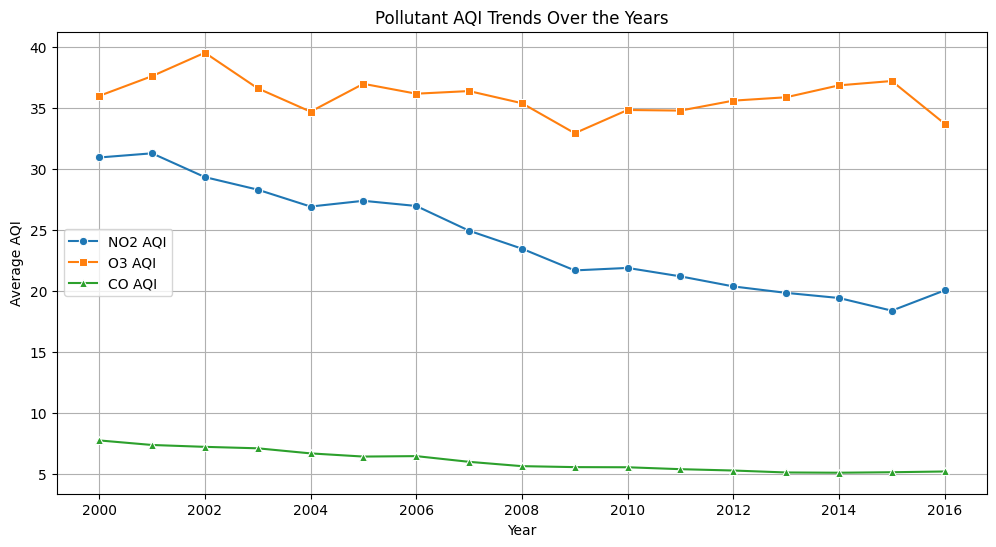

In [58]:
pollutant_trend = df.groupby('Year')[['NO2 AQI', 'O3 AQI', 'CO AQI']].mean().reset_index()

plt.figure(figsize=(12,6))
sb.lineplot(data=pollutant_trend, x='Year', y='NO2 AQI', label='NO2 AQI', marker='o')
sb.lineplot(data=pollutant_trend, x='Year', y='O3 AQI', label='O3 AQI', marker='s')
sb.lineplot(data=pollutant_trend, x='Year', y='CO AQI', label='CO AQI', marker='^')
plt.title('Pollutant AQI Trends Over the Years')
plt.ylabel('Average AQI')
plt.grid(True)
plt.legend()
plt.show()



#### Insight:

#### NO₂, O₃, and CO AQI levels have shown a consistent decline from 2000 to 2016.Reflects effective environmental regulations, cleaner technology, and improved monitoring.Notably, O₃ remains the most persistent pollutant despite improvements.



<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Average Max AQI by Quarter</strong></h1>
</div>

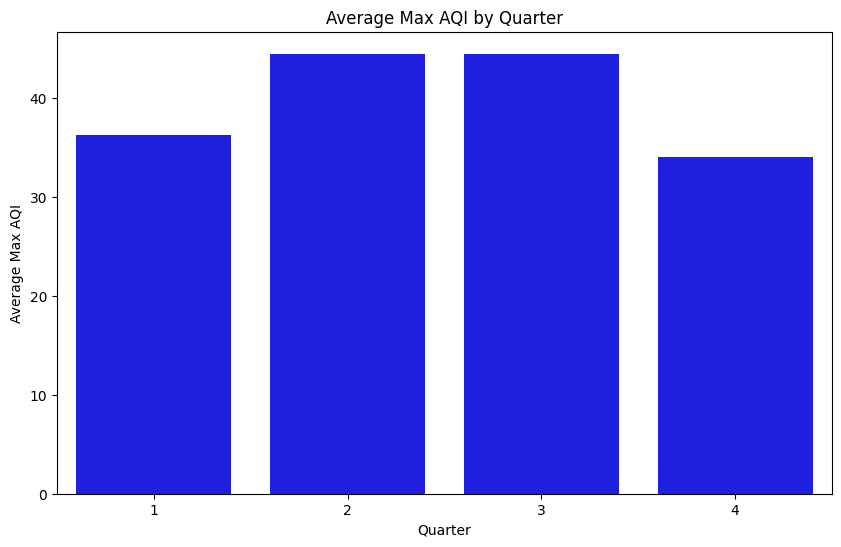

In [59]:
df['Quarter'] = pd.to_datetime(df['Date Local']).dt.quarter
quarterly = df.groupby('Quarter')['Max AQI'].mean().reset_index()
plt.figure(figsize=(10,6))
sb.barplot(data=quarterly, x='Quarter', y='Max AQI', color='blue')
plt.title('Average Max AQI by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Max AQI')
plt.show()


#### Insight:

#### Q3 (July–September) has the highest average max AQI across years.Confirms that summer is the worst season for air quality, aligning with the spike in ozone pollution during hot months.

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Final Insights</strong></h1>
</div>

##### - Summer is the most polluted season, especially from July to September, with the highest AQI levels.
##### - Inland areas have worse air quality than coastal areas, likely due to less ventilation and more industrial activity.
##### - Riverside, Meigs, and Forsyth are the top polluted counties based on Max AQI values.
##### - NO₂, O₃ (Ozone), and CO are the major pollutants, especially during hot months.
##### - Western and Midwestern states, including parts of Mexico and the District of Columbia, show high CO pollution.
##### - Air quality improves in winter, showing the lowest AQI values.
##### - Long-term trend shows some consistency in pollution in certain areas, indicating persistent local issues

<div style="background-color: #d6f3fa; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; margin: 0;"><strong>Recommendation</strong></h1>
</div>

##### - Increase pollution control during summer months, especially for ozone and NO₂.
##### - Promote public transport and reduce traffic emissions in heavily polluted counties.
##### - Enhance air quality monitoring in inland and industrial-heavy regions.
##### - Support green spaces and urban forestry in polluted cities to improve dispersion.
##### - Encourage seasonal policy actions, like emission restrictions during high-AQI months (July–September).
##### - Raise awareness about summer pollution health risks in affected regions.